In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import accuracy score function
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

function

In [38]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [39]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [40]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [41]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [42]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [43]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

Training set

In [44]:
train_data = pd.read_csv("oversampled_train_split2.csv")
train_data.shape

(516, 32)

In [45]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(516, 30)

In [46]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


Testing set

In [47]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [48]:
x_test = test_data[test_data.columns[3:]]
x_test.shape

(114, 30)

In [49]:
y_test = test_data[test_data.columns[2]]
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


Validation set

In [50]:
val_data = pd.read_csv("val_split2.csv")
val_data.shape

(91, 32)

In [51]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [52]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


-

In [53]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy() 

In [54]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)


Shape of training set: (516, 30)
Shape of test set: (114, 30)


In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val) 

# Random Forest Classifier

แบบ 1

In [56]:
from sklearn.ensemble import RandomForestClassifier

#rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
#rand_clf.fit(X_train, y_train) # map

แบบ 2

In [57]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 10)
rand_clf.fit(X_train, y_train) # map

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10)

In [58]:
y_pred = rand_clf.predict(X_test)

In [59]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [60]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9864341085271318
0.8947368421052632


In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [12 56]]


In [63]:
from sklearn.metrics import classification_report

In [64]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        46
           1       1.00      0.82      0.90        68

    accuracy                           0.89       114
   macro avg       0.90      0.91      0.89       114
weighted avg       0.92      0.89      0.90       114



# validate set

In [65]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)


Confusion Matrix
----------------
[[52  1]
 [ 2 36]] 

----------------


In [66]:
 # Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 94.74%
Specificity: 98.11%
Accuracy: 96.70%
Precision: 97.30%
Sensitivity: 94.74%
Precision: 97.30%
F1: 96.00%


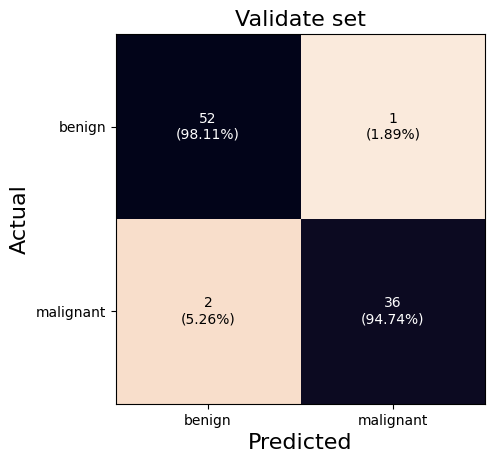

In [67]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

# test set

In [68]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [12 56]] 

----------------


In [69]:
# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

Sensitivity: 82.35%
Specificity: 100.00%
Accuracy: 89.47%
Precision: 100.00%
Sensitivity: 82.35%
Precision: 100.00%
F1: 90.32%


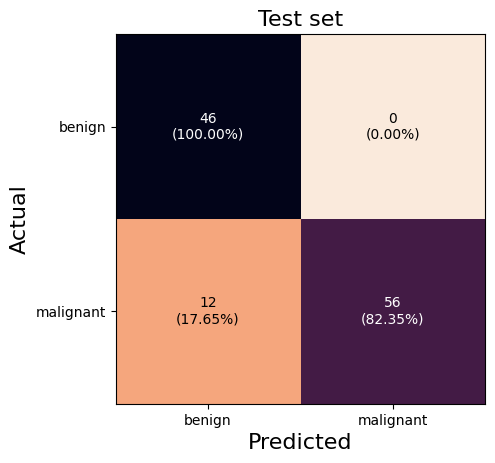

In [70]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

# plot ROC curve

In [71]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

---------------------------------------
AUC validate: 0.9643
AUC test: 0.9118


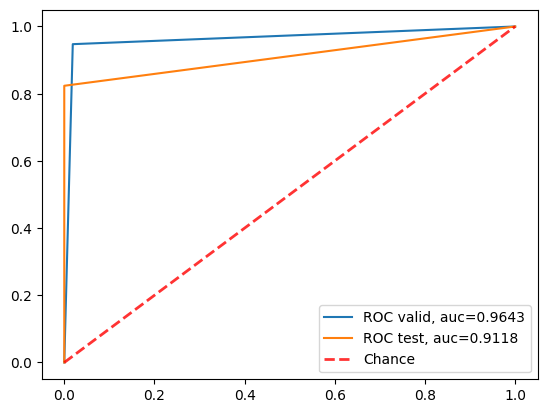

In [72]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()